<a href="https://colab.research.google.com/github/vinayakghatul/MLflow_Experiment_tracking/blob/main/Experiment_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment tracking

The usual process for building an EndToEnd machine learning project involves collecting and processing raw data, analyzing it features at steps, training different algorithms, evaluating them, and deploying the best model on some platform for user access.
It seems fairly straightforward, right? But in reality it is not. There are several complexities that arise along the way. Due to the circular nature of this process, its more about experimenting and trying out different things that may work

* ML is not just code. It is code plus data that we need to keep a track of. Data can be sourced from multiple storage units
* use different models and model hyperparameters
* run the same code in a different environment
* Model governance is another important aspect, where everything starting from experimentation to deployment is tracked for auditing purposes, where models are tested for speed, accuracy, drift while in production to avoid inaccuracy.

You can think of experiments as the process of building an ML model. When we say experiment run, we mean each trial in an ML experiment. So the ML experiment is actually the whole process that a data scientist may start playing with some data, models and hyperparameters. Each of these trials is an experiment run.

Experiment tracking is the process of keeping track of all the relevant information from ML experiments.

* **Organize** all the necessary components of a specific experiment. It's important to have everything in one place and know where it is so you can use them later.
* **Reproduce** past results (easily) using saved experiments.
* **Log** iterative improvements across time, data, ideas, teams, etc.

If you are working in a finance company and are tasked with creating a ml model that based on certain conditions classify if the applicant should be given a loan or not

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_df = pd.read_csv('train.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Binary Encoding of Categorical Variables

In [ ]:
train_df['Gender']= train_df['Gender'].map({'Male':0, 'Female':1})
train_df['Married']= train_df['Married'].map({'No':0, 'Yes':1})
train_df['Loan_Status']= train_df['Loan_Status'].map({'N':0, 'Y':1})

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 62.5+ KB


## Checking for Missing Values

In [ ]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
## dropping all the missing values
train_df = train_df.dropna()
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Segregating the target variable from the features

In [ ]:
X = train_df[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = train_df.Loan_Status
X.shape, y.shape

((480, 5), (480,))

## Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

## Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=4, random_state=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=5)

## Cross Validation

In [ ]:
from sklearn.metrics import accuracy_score

pred_val = model.predict(X_val)
accuracy_score(y_val, pred_val)

0.7916666666666666

In [ ]:
pred_train = model.predict(X_train)
accuracy_score(y_train, pred_train)

0.8385416666666666

=======### We have created a model successfully, but now we have new set of data how do you proceed on working with it

* we can change the data and run the code again
    * but we will loose the output and results from the old data
* we can create new cells below these to create a new model with the new data
    * but then when we have a lot of experiments in one file it will be really difficult finding the one we want to look at
* We can create new files for each experiment
    * but for actually comparing the rsults and outputs you'll still have to ope each file and look into it closely

these are not the best ways of keeping track of the work and experiments that you perform, we need to create something that easy to manage, clearly shows the results and metrics, logs the changes and hyperparameters for us

# ML Flow

https://mlflow.org/

MLflow is an open-source platform to manage Machine Learning Lifecycle. In layman’s terms, it can track and store data, parameters, and metrics to be retrieved later or displayed nicely on a web interface.Furthermore, MLflow is a framework-agnostic tool, so any ML / DL framework can quickly adapt to the ecosystem that MLflow proposes.

MLflow emerges as a platform that offers tools for tracking metrics, artifacts, and metadata.

## ML flow Tracking


MLflow Tracking is an API-based tool for logging metrics, parameters, model versions, code versions, and files. MLflow Tracking is integrated with a UI for visualizing and managing artifacts, models, files, etc.

Each MLflow Tracking session is organized and managed under the concept of runs.
* A run refers to the execution of code where the artifact log is performed explicitly.

By default, the runs are stored in the directory where the code session is executed. However, MLflow also allows storing artifacts on a local or remote server, for better collaboration.
we'll st

### getting started

In [ ]:
!pip3 install mlflow

In [ ]:
import mlflow
import os

we'll start by setting up our experiment name under which we wanna perform all our work

* An MLflow experiment is the primary unit of organization and access control for MLflow runs; all MLflow runs belong to an experiment. Experiment:{run,run.....run}
* Experiments let you visualize, search for, and compare runs, as well as download run artifacts and metadata for analysis in other tools.
* An MLflow run corresponds to a single execution of model code. Each run records the some information about that particulr trial:

In [ ]:
mlflow.set_experiment("loan_status")

2024/02/04 19:07:09 INFO mlflow.tracking.fluent: Experiment with name 'loan_status' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///Users/vinayak/Desktop/ML-OPs/mlruns/354447053124327892', creation_time=1707053829495, experiment_id='354447053124327892', last_update_time=1707053829495, lifecycle_stage='active', name='loan_status', tags={}>

Next, you can start to think about what do you want to keep track in your analysis/experiment. MLflow categorizes these into:

* **Parameters** (via mlflow.log_param() ). Parameters are variables that you change or tweak when tuning your model.
* **Metrics** (using mlflow.log_metric() ). Metrics are values that you want to measure as a result of tweaking your parameters. Typical metrics that are tracked can be items like F1 score, RMSE, MAE etc.
* **Artifacts** (using mlflow.log_artifact() ). Artifacts are any other items that you wish to store. Typical artifacts to keep track of are PNGs of graphs,plots, confusion matrix, and also pickled model files

Params are something you want to tune based on the metrics, whereas tags are some extra information that doesn't necessarily associate with the model's performance. there's no hard constraint on which to use to log which; they can be used interchangeably without error.

In [ ]:
with mlflow.start_run():
    model_rf = RandomForestClassifier(max_depth=4, random_state=5)
    model_rf.fit(X_train, y_train)

    pred_val = model_rf.predict(X_val)
    val_acc=accuracy_score(y_val, pred_val)

    pred_train = model_rf.predict(X_train)
    train_acc=accuracy_score(y_train, pred_train)

    mlflow.set_tag('mlflow.runName','first_run')
    mlflow.log_param('max_depth',4)
    mlflow.log_metric('val_acc',val_acc)
    mlflow.log_metric('train_acc',train_acc)

    mlflow.sklearn.log_model(model_rf, "model")



we can use this with command to start the ml flow run and whatever we do inside of that start_run indent will be tracked

inside that we create our first model and log the different parameters and metric for that model
we set the name of the run and log the max depth of the rf model and also the acc score. All of the parameters and models are stored in files in the experiment folder with each runs having seperate folders. you can open those files to see the stored data

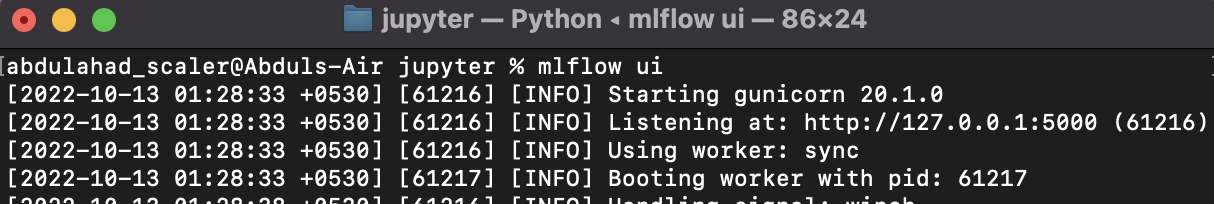

### mlflow ui

MLflow also provides the option to view all the runs and experiments on a web based ui that is really easy to use and see the logged data.
Launch the MLflow tracking UI for local viewing of run results.
In the folder where you have this experiments run the command **mlflow ui**
this will start an ml flow ui server that is by default open at port 5000 on your localhost or 127.0.0.1
you can change the port by using -p port_num along with the command eg: **mlflow ui -p 8899**

* open the correct link or copy the provided url from the command

In [ ]:
!mlflow ui

[2024-02-04 19:16:35 +0530] [35648] [INFO] Starting gunicorn 21.2.0
[2024-02-04 19:16:35 +0530] [35648] [INFO] Listening at: http://127.0.0.1:5000 (35648)
[2024-02-04 19:16:35 +0530] [35648] [INFO] Using worker: sync
[2024-02-04 19:16:35 +0530] [35649] [INFO] Booting worker with pid: 35649
[2024-02-04 19:16:36 +0530] [35650] [INFO] Booting worker with pid: 35650
[2024-02-04 19:16:36 +0530] [35651] [INFO] Booting worker with pid: 35651
[2024-02-04 19:16:36 +0530] [35652] [INFO] Booting worker with pid: 35652
[2024-02-04 19:35:41 +0530] [35648] [CRITICAL] WORKER TIMEOUT (pid:35649)
[2024-02-04 19:35:41 +0530] [35648] [CRITICAL] WORKER TIMEOUT (pid:35650)
[2024-02-04 19:35:41 +0530] [35648] [CRITICAL] WORKER TIMEOUT (pid:35651)
[2024-02-04 19:35:41 +0530] [35648] [CRITICAL] WORKER TIMEOUT (pid:35652)
[2024-02-04 19:35:41 +0530] [35652] [INFO] Worker exiting (pid: 35652)
[2024-02-04 19:35:41 +0530] [35651] [INFO] Worker exiting (pid: 35651)
[2024-02-04 19:35:41 +0530] [35649] [INFO] Worker

here is the web ui launched on a browser, as you can see we are under the loan_status experimnet name and have a run that we created with the name first_run.
there are several other informations as welllike the source code that we used, the user thatcreated that run and the model that we stored

if we click on any particular run we cansee more details about that run. we have here the all the detailsthat we logged for that particular model in a very easy to understand fashion

Load the new data and proceed furthur

In [ ]:
train_df = pd.read_csv('train.csv')
train_df.head()

train_df['Gender']= train_df['Gender'].map({'Male':0, 'Female':1})
train_df['Married']= train_df['Married'].map({'No':0, 'Yes':1})
train_df['Loan_Status']= train_df['Loan_Status'].map({'N':0, 'Y':1})

train_df = train_df.dropna()

X = train_df[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = train_df.Loan_Status
X.shape, y.shape

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
with mlflow.start_run():
    model_rf = RandomForestClassifier(max_depth=4, random_state=5)
    model_rf.fit(X_train, y_train)

    pred_val = model_rf.predict(X_val)
    val_acc=accuracy_score(y_val, pred_val)

    pred_train = model_rf.predict(X_train)
    train_acc=accuracy_score(y_train, pred_train)

    mlflow.set_tag('mlflow.runName','new_data')
    mlflow.log_param('max_depth',4)
    mlflow.log_metric('val_acc',val_acc)
    mlflow.log_metric('train_acc',train_acc)
    mlflow.set_tag('data file','data_new.csv')

    mlflow.sklearn.log_model(model_rf, "model")



if we go back to the web ui we can see that we have another run logged
with the information we have we changed we added a new name and the name of the datafile

Now if we want to tune the RF model

In [ ]:

def mlflow_runs(n_est,max_dep,i):
    with mlflow.start_run():

        model_rf = RandomForestClassifier(n_estimators=n_est, max_depth=max_dep, random_state=5)
        model_rf.fit(X_train, y_train)

        pred_val = model_rf.predict(X_val)
        val_acc=accuracy_score(y_val, pred_val)

        pred_train = model_rf.predict(X_train)
        train_acc=accuracy_score(y_train, pred_train)

        run="hyperparameter_run_"+str(i)
        mlflow.set_tag('mlflow.runName',run)
        mlflow.log_param('n_estimators',n_est)
        mlflow.log_param('max_depth',max_dep)
        mlflow.log_metric('val_acc',val_acc)
        mlflow.log_metric('train_acc',train_acc)
        mlflow.set_tag('data file','data_new.csv')

        mlflow.sklearn.log_model(model_rf, "model")

In [ ]:
mlflow_runs(10,2,1)
mlflow_runs(20,2,2)
mlflow_runs(40,2,3)
mlflow_runs(10,4,4)
mlflow_runs(20,4,5)
mlflow_runs(40,4,6)
mlflow_runs(10,8,7)
mlflow_runs(20,8,8)
mlflow_runs(40,8,9)

here we can see there are 9 new runs that show how our model performed
* we can see that increasing the number of tress improves the model a lot
* if we have a deep model with less number of trees it seems to overfit because the train accuracy is very high but the valaccuracy is low
you can also see there are two failed runs so they have no data associated with them

now if you want to try out another model like knn for this task

after all the testing and trying we can say that we will chose the random forest model with max depth =8 and number of trees=40